In [1]:
!pip install Pyspark
!pip install nltk

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')
from pyspark.ml.feature import VectorAssembler

In [3]:
spark = SparkSession.builder.appName("Spark Examples").getOrCreate()

# Apply a predefined Function on Your Dataframe Columns

In [4]:
data = spark.read.format("csv")\
            .option("header", "true")\
            .load("/content/Tweets.csv")

In [5]:
data.show(5)

+-----+--------------------+
|   id|               tweet|
+-----+--------------------+
|31963|#studiolife #aisl...|
|31964| @user #white #su...|
|31965|safe ways to heal...|
|31966|is the hp and the...|
|31967|  3rd #bihday to ...|
+-----+--------------------+
only showing top 5 rows



##Pyspark User Defined Functions
https://sparkbyexamples.com/pyspark/pyspark-udf-user-defined-function/

**Make a function that removes stopwords from tweet column**

In [6]:
def remove_stopwords(tweet):
  stop = set(stopwords.words('english'))
  split_tweet = tweet.split()
  cleaned_tweet = [word for word in split_tweet if word not in stop]
  cleaned_tweet = " ".join([word for word in cleaned_tweet if word !="@user"])
  return cleaned_tweet

In [7]:
# test function ouput
remove_stopwords("Hello I am in my house @user")

'Hello I house'

In [8]:
# Convert your Python function to PySpark UDF (User defined Function)
removeStopwords = F.udf(remove_stopwords)

In [9]:
# Now add the new column to your Dataframe
data = data.withColumn("tweetCleaned", removeStopwords(data.tweet))

In [10]:
data.show()

+-----+--------------------+--------------------+
|   id|               tweet|        tweetCleaned|
+-----+--------------------+--------------------+
|31963|#studiolife #aisl...|#studiolife #aisl...|
|31964| @user #white #su...|#white #supremaci...|
|31965|safe ways to heal...|safe ways heal #a...|
|31966|is the hp and the...|hp cursed child b...|
|31967|  3rd #bihday to ...|3rd #bihday amazi...|
|31968|choose to be   :)...|  choose :) #momtips|
|31969|something inside ...|something inside ...|
|31970|#finished#tattoo#...|#finished#tattoo#...|
|31971| @user @user @use...|never understand ...|
|31972|#delicious   #foo...|#delicious #food ...|
|31973|1000dayswasted - ...|1000dayswasted - ...|
|31974|one of the world'...|one world's great...|
|31975|half way through ...|half way website ...|
|31976|good food, good l...|good food, good l...|
|31977|i'll stand behind...|i'll stand behind...|
|31978|i ate,i ate and i...|ate,i ate ate...ð...|
|31979| @user got my @us...|got limited editi...|


In [11]:
# drop the old tweet column
data = data.drop("tweet")

In [12]:
data.show()

+-----+--------------------+
|   id|        tweetCleaned|
+-----+--------------------+
|31963|#studiolife #aisl...|
|31964|#white #supremaci...|
|31965|safe ways heal #a...|
|31966|hp cursed child b...|
|31967|3rd #bihday amazi...|
|31968|  choose :) #momtips|
|31969|something inside ...|
|31970|#finished#tattoo#...|
|31971|never understand ...|
|31972|#delicious #food ...|
|31973|1000dayswasted - ...|
|31974|one world's great...|
|31975|half way website ...|
|31976|good food, good l...|
|31977|i'll stand behind...|
|31978|ate,i ate ate...ð...|
|31979|got limited editi...|
|31980|&amp; #love &amp;...|
|31981|ð­ðð #gir...|
|31982|thought factory: ...|
+-----+--------------------+
only showing top 20 rows



**Function to apply word count on tweet column**

In [13]:
def word_count_column(tweet):
  split_tweet = tweet.split()
  dic_of_words = {}
  for word in split_tweet:
    dic_of_words[word] = split_tweet.count(word)
  return dic_of_words

In [14]:
word_count_column("a set of words that is complete in itself, typically containing a subject and predicate, conveying a statement, question, exclamation, or command, and consisting of a main clause and sometimes one or more subordinate clauses.")

{'a': 4,
 'and': 3,
 'clause': 1,
 'clauses.': 1,
 'command,': 1,
 'complete': 1,
 'consisting': 1,
 'containing': 1,
 'conveying': 1,
 'exclamation,': 1,
 'in': 1,
 'is': 1,
 'itself,': 1,
 'main': 1,
 'more': 1,
 'of': 2,
 'one': 1,
 'or': 2,
 'predicate,': 1,
 'question,': 1,
 'set': 1,
 'sometimes': 1,
 'statement,': 1,
 'subject': 1,
 'subordinate': 1,
 'that': 1,
 'typically': 1,
 'words': 1}

In [15]:
# Convert your Python function to PySpark UDF (User defined Function)
countWords = F.udf(word_count_column)

In [16]:
# Now add the new column to your Dataframe
data = data.withColumn("WordCount", countWords(data.tweetCleaned))

In [17]:
data.show()

+-----+--------------------+--------------------+
|   id|        tweetCleaned|           WordCount|
+-----+--------------------+--------------------+
|31963|#studiolife #aisl...|{#willpower=1, fi...|
|31964|#white #supremaci...|{#movie=1, new=1,...|
|31965|safe ways heal #a...|{ways=1, #healing...|
|31966|hp cursed child b...|{#harrypotter=1, ...|
|31967|3rd #bihday amazi...|{ahmir!=1, misses...|
|31968|  choose :) #momtips|{#momtips=1, choo...|
|31969|something inside ...|{ð¦ð¿â¨=1, #...|
|31970|#finished#tattoo#...|{!!!=1, #finished...|
|31971|never understand ...|{never=1, young.....|
|31972|#delicious #food ...|{mannaepicure=1, ...|
|31973|1000dayswasted - ...|{bass=1, ep..=1, ...|
|31974|one world's great...|{#teamaudi=1, wor...|
|31975|half way website ...|{#allgoingwell=1,...|
|31976|good food, good l...|{called=1, #enjoy...|
|31977|i'll stand behind...|{#taketheguns=1, ...|
|31978|ate,i ate ate...ð...|{#hilsa=1, ate,i=...|
|31979|got limited editi...|{!=1, rain=1, set...|


**Apply Edits on your Function to Give you the most repeated word**

In [18]:
def Most_repeated_word(tweet):
  split_tweet = tweet.split()
  dic_of_words = {}
  for word in split_tweet:
    dic_of_words[word] = split_tweet.count(word)
  Most_repeated = max(dic_of_words, key=dic_of_words.get,default=0)
  return Most_repeated

In [19]:
Most_repeated_word("containing a subject and predicate, subject subject subject conveying a statement,")

'subject'

In [20]:
repeated_word = F.udf(Most_repeated_word)
data = data.withColumn("mostRepeatedWord", repeated_word(data.tweetCleaned))

In [21]:
data.show()

+-----+--------------------+--------------------+--------------------+
|   id|        tweetCleaned|           WordCount|    mostRepeatedWord|
+-----+--------------------+--------------------+--------------------+
|31963|#studiolife #aisl...|{#willpower=1, fi...|         #studiolife|
|31964|#white #supremaci...|{#movie=1, new=1,...|              #white|
|31965|safe ways heal #a...|{ways=1, #healing...|                safe|
|31966|hp cursed child b...|{#harrypotter=1, ...|                  hp|
|31967|3rd #bihday amazi...|{ahmir!=1, misses...|                 3rd|
|31968|  choose :) #momtips|{#momtips=1, choo...|              choose|
|31969|something inside ...|{ð¦ð¿â¨=1, #...|           something|
|31970|#finished#tattoo#...|{!!!=1, #finished...|#finished#tattoo#...|
|31971|never understand ...|{never=1, young.....|               never|
|31972|#delicious #food ...|{mannaepicure=1, ...|          #delicious|
|31973|1000dayswasted - ...|{bass=1, ep..=1, ...|      1000dayswasted|
|31974

In [22]:
data.toPandas().to_csv('final_data.csv',index=False)

In [23]:
pd.read_csv("/content/final_data.csv").head()

,id,tweetCleaned,WordCount,mostRepeatedWord
0,31963,#studiolife #aislife #requires #passion #dedic...,"{#willpower=1, find=1, #passion=1, #requires=1...",#studiolife
1,31964,#white #supremacists want everyone see new â...,"{#movie=1, new=1, #white=1, see=1, â=1, ever...",#white
2,31965,safe ways heal #acne!! #altwaystoheal #healthy...,"{ways=1, #healing!!=1, heal=1, safe=1, #acne!!...",safe
3,31966,hp cursed child book reservations already? yes...,"{#harrypotter=1, where?=1, ððð=1, #fa...",hp
4,31967,"3rd #bihday amazing, hilarious #nephew eli ahm...","{ahmir!=1, missesâ¦=1, dave=1, eli=1, #bihday...",3rd


# Kmeans Using Pyspark
https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.ml.clustering.KMeans.html

In [24]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
from pyspark.ml.linalg import Vectors
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

The dataset consists of information about customers Visiting a mall 
- problem: Cluster customers into segments

In [25]:
df = spark.read.csv('/content/customer_segments.csv', header=True)
df.show()

+---+---+------------------+----------------------+
| id|Age|Annual Income (k$)|Spending Score (1-100)|
+---+---+------------------+----------------------+
|  1| 19|                15|                    39|
|  2| 21|                15|                    81|
|  3| 20|                16|                     6|
|  4| 23|                16|                    77|
|  5| 31|                17|                    40|
|  6| 22|                17|                    76|
|  7| 35|                18|                     6|
|  8| 23|                18|                    94|
|  9| 64|                19|                     3|
| 10| 30|                19|                    72|
| 11| 67|                19|                    14|
| 12| 35|                19|                    99|
| 13| 58|                20|                    15|
| 14| 24|                20|                    77|
| 15| 37|                20|                    13|
| 16| 22|                20|                    79|
| 17| 35|   

Spark's implementation of KMeans is a bit different from for example scikit-learn's version. We need to store all features as an array of floats, and store this array as a column called "features". Since we do no longer need the original columns we filter them out with a select statement.
- "features" column: Vector of your dataset features

First cast columns datatypes to be float

In [26]:
FEATURES_COL = ['Age','Annual Income (k$)','Spending Score (1-100)']

In [27]:
for col in df.columns:
  if col in FEATURES_COL:
    df = df.withColumn(col,df[col].cast('float'))
df.show()

+---+----+------------------+----------------------+
| id| Age|Annual Income (k$)|Spending Score (1-100)|
+---+----+------------------+----------------------+
|  1|19.0|              15.0|                  39.0|
|  2|21.0|              15.0|                  81.0|
|  3|20.0|              16.0|                   6.0|
|  4|23.0|              16.0|                  77.0|
|  5|31.0|              17.0|                  40.0|
|  6|22.0|              17.0|                  76.0|
|  7|35.0|              18.0|                   6.0|
|  8|23.0|              18.0|                  94.0|
|  9|64.0|              19.0|                   3.0|
| 10|30.0|              19.0|                  72.0|
| 11|67.0|              19.0|                  14.0|
| 12|35.0|              19.0|                  99.0|
| 13|58.0|              20.0|                  15.0|
| 14|24.0|              20.0|                  77.0|
| 15|37.0|              20.0|                  13.0|
| 16|22.0|              20.0|                 

**Now Create a features column**

In [28]:
Feautes_Assembler = VectorAssembler(inputCols=FEATURES_COL, outputCol="features")
df_kmeans = Feautes_Assembler.transform(df).select("id",'features')
df_kmeans.show()

+---+----------------+
| id|        features|
+---+----------------+
|  1|[19.0,15.0,39.0]|
|  2|[21.0,15.0,81.0]|
|  3| [20.0,16.0,6.0]|
|  4|[23.0,16.0,77.0]|
|  5|[31.0,17.0,40.0]|
|  6|[22.0,17.0,76.0]|
|  7| [35.0,18.0,6.0]|
|  8|[23.0,18.0,94.0]|
|  9| [64.0,19.0,3.0]|
| 10|[30.0,19.0,72.0]|
| 11|[67.0,19.0,14.0]|
| 12|[35.0,19.0,99.0]|
| 13|[58.0,20.0,15.0]|
| 14|[24.0,20.0,77.0]|
| 15|[37.0,20.0,13.0]|
| 16|[22.0,20.0,79.0]|
| 17|[35.0,21.0,35.0]|
| 18|[20.0,21.0,66.0]|
| 19|[52.0,23.0,29.0]|
| 20|[35.0,23.0,98.0]|
+---+----------------+
only showing top 20 rows



**Train The model**

In [29]:
kmeans = KMeans().setK(6).setSeed(1).setMaxIter(500).setFeaturesCol("features")
model = kmeans.fit(df_kmeans)

In [30]:
predictions = model.transform(df_kmeans)

In [31]:
predictions.show()

+---+----------------+----------+
| id|        features|prediction|
+---+----------------+----------+
|  1|[19.0,15.0,39.0]|         5|
|  2|[21.0,15.0,81.0]|         2|
|  3| [20.0,16.0,6.0]|         5|
|  4|[23.0,16.0,77.0]|         2|
|  5|[31.0,17.0,40.0]|         5|
|  6|[22.0,17.0,76.0]|         2|
|  7| [35.0,18.0,6.0]|         5|
|  8|[23.0,18.0,94.0]|         2|
|  9| [64.0,19.0,3.0]|         5|
| 10|[30.0,19.0,72.0]|         2|
| 11|[67.0,19.0,14.0]|         5|
| 12|[35.0,19.0,99.0]|         2|
| 13|[58.0,20.0,15.0]|         5|
| 14|[24.0,20.0,77.0]|         2|
| 15|[37.0,20.0,13.0]|         5|
| 16|[22.0,20.0,79.0]|         2|
| 17|[35.0,21.0,35.0]|         5|
| 18|[20.0,21.0,66.0]|         2|
| 19|[52.0,23.0,29.0]|         5|
| 20|[35.0,23.0,98.0]|         2|
+---+----------------+----------+
only showing top 20 rows



**Evaluate The model**

In [32]:
evaluator = ClusteringEvaluator()

silhouette = evaluator.evaluate(predictions)
print("Silhouette with squared euclidean distance = " + str(silhouette))

# Shows the result.
centers = model.clusterCenters()
print("Cluster Centers: ")
for center in centers:
    print(center)

Silhouette with squared euclidean distance = 0.5978076670991005
Cluster Centers: 
[43.28571429 54.81818182 49.88311688]
[32.69230769 86.53846154 82.12820513]
[25.52173913 26.30434783 78.56521739]
[ 42.63636364 108.18181818  21.27272727]
[39.48148148 78.37037037 17.55555556]
[45.2173913  26.30434783 20.91304348]


In [33]:
predictions_df = predictions.select("id", "prediction")

In [34]:
predictions_df.show(5)

+---+----------+
| id|prediction|
+---+----------+
|  1|         5|
|  2|         2|
|  3|         5|
|  4|         2|
|  5|         5|
+---+----------+
only showing top 5 rows



**Join the prediction column with the your original data using the id column**

In [35]:
df_final_preds = predictions_df.join(df, 'id')
df_final_preds.show()

+---+----------+----+------------------+----------------------+
| id|prediction| Age|Annual Income (k$)|Spending Score (1-100)|
+---+----------+----+------------------+----------------------+
|  1|         5|19.0|              15.0|                  39.0|
|  2|         2|21.0|              15.0|                  81.0|
|  3|         5|20.0|              16.0|                   6.0|
|  4|         2|23.0|              16.0|                  77.0|
|  5|         5|31.0|              17.0|                  40.0|
|  6|         2|22.0|              17.0|                  76.0|
|  7|         5|35.0|              18.0|                   6.0|
|  8|         2|23.0|              18.0|                  94.0|
|  9|         5|64.0|              19.0|                   3.0|
| 10|         2|30.0|              19.0|                  72.0|
| 11|         5|67.0|              19.0|                  14.0|
| 12|         2|35.0|              19.0|                  99.0|
| 13|         5|58.0|              20.0|

**Convert it to pandas df**

In [36]:
preds = df_final_preds.toPandas().set_index('id')
preds.head()

,prediction,Age,Annual Income (k$),Spending Score (1-100)
id,,,,
1,5,19.0,15.0,39.0
2,2,21.0,15.0,81.0
3,5,20.0,16.0,6.0
4,2,23.0,16.0,77.0
5,5,31.0,17.0,40.0


**Visualize Final Clusters**

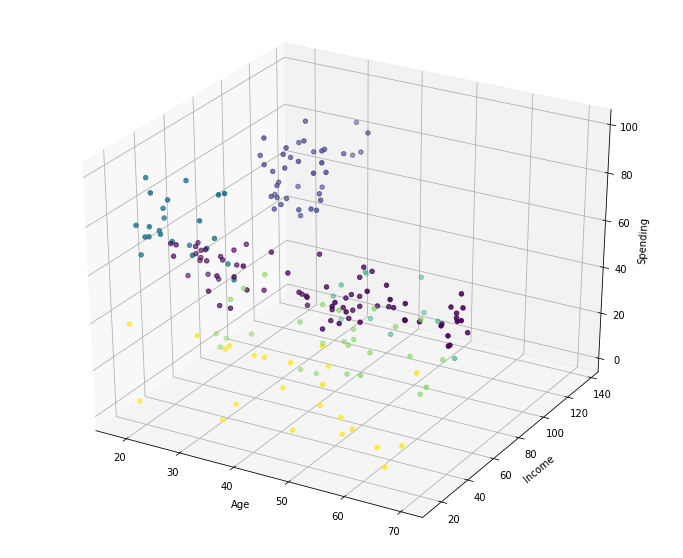

In [37]:
cluster_fig = plt.figure(figsize=(12,10)).gca(projection='3d')
cluster_fig.scatter(preds['Age'],preds['Annual Income (k$)'],preds['Spending Score (1-100)'], c=preds['prediction'])
cluster_fig.set_xlabel('Age')
cluster_fig.set_ylabel('Income')
cluster_fig.set_zlabel('Spending')
plt.show()